In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('data.csv')

Data Source: [WISCONSIN BREAST CANCER DATASET](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [22]:
df.shape

(569, 33)

In [23]:
useful_cols = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst', 'diagnosis']
df = df[useful_cols]

In [24]:
df.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654,M
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860,M
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430,M
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575,M
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625,M


In [25]:
df.isna().sum()

radius_mean             0
perimeter_mean          0
area_mean               0
concavity_mean          0
concave points_mean     0
radius_worst            0
perimeter_worst         0
area_worst              0
concavity_worst         0
concave points_worst    0
diagnosis               0
dtype: int64

In [26]:
df.describe()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104,0.088799,0.048919,16.269190,107.261213,880.583128,0.272188,0.114606
std,3.524049,24.298981,351.914129,0.079720,0.038803,4.833242,33.602542,569.356993,0.208624,0.065732
min,6.981000,43.790000,143.500000,0.000000,0.000000,7.930000,50.410000,185.200000,0.000000,0.000000
25%,11.700000,75.170000,420.300000,0.029560,0.020310,13.010000,84.110000,515.300000,0.114500,0.064930
50%,13.370000,86.240000,551.100000,0.061540,0.033500,14.970000,97.660000,686.500000,0.226700,0.099930
75%,15.780000,104.100000,782.700000,0.130700,0.074000,18.790000,125.400000,1084.000000,0.382900,0.161400
max,28.110000,188.500000,2501.000000,0.426800,0.201200,36.040000,251.200000,4254.000000,1.252000,0.291000


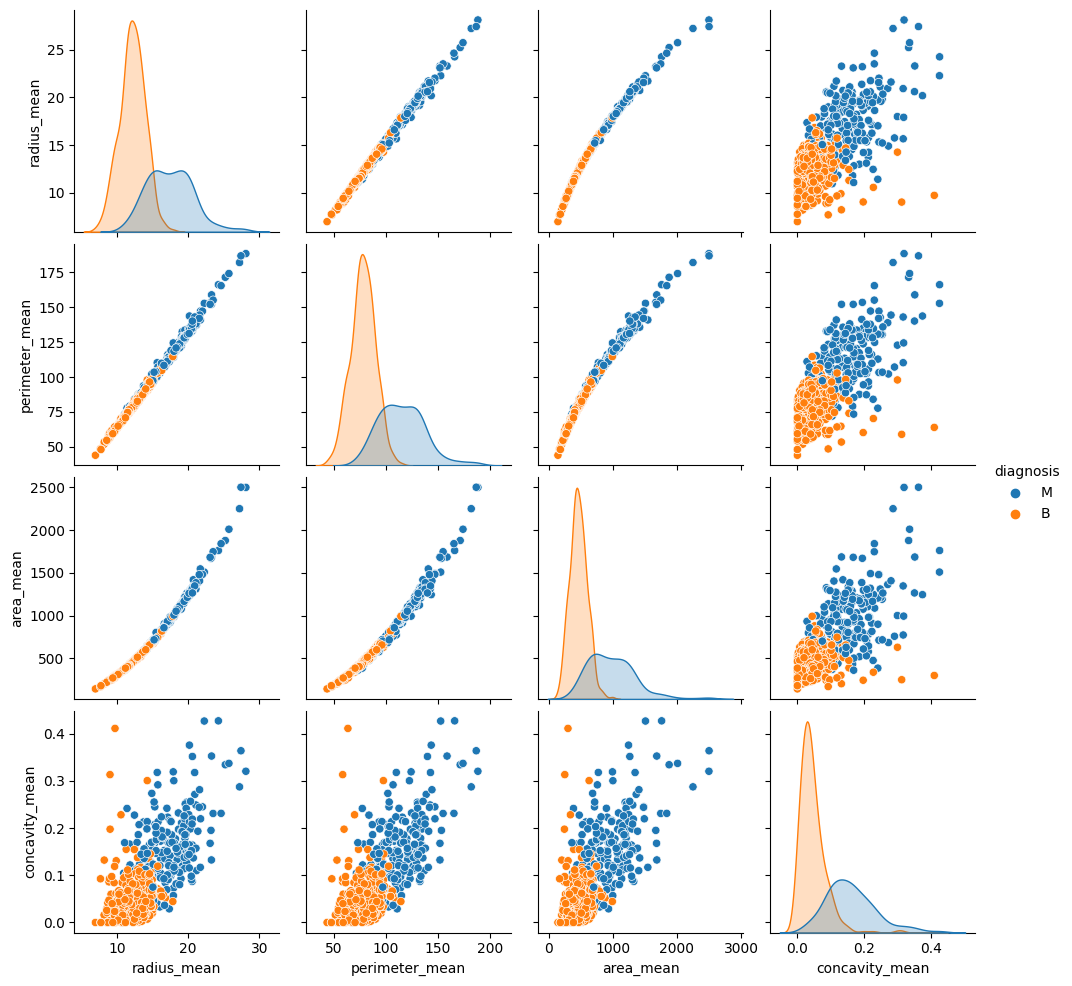

In [27]:
sns.pairplot(df, hue = 'diagnosis', vars = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean'])

In [28]:

X,y = df.drop('diagnosis' , axis = 1).values , df.diagnosis.values
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0, test_size = .2)

In [29]:
def train_model(estimator):
    estimator.fit(X_train,y_train)
    test_score = estimator.score(X_test,y_test)
    print(f'Accuracy of {estimator} on the test set is: {test_score:4f}')
    print('==========================================================\n')

In [30]:
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
knn = KNeighborsClassifier()

In [31]:
train_model(rf)
train_model(ada)
train_model(knn)

Accuracy of RandomForestClassifier(random_state=0) on the test set is: 0.956140

Accuracy of AdaBoostClassifier(random_state=0) on the test set is: 0.964912

Accuracy of KNeighborsClassifier() on the test set is: 0.938596



In [32]:

model = AdaBoostClassifier(random_state = 0, learning_rate = .107)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9736842105263158

In [33]:
pickle.dump(model, open('breast_cancer_model.pkl', 'wb')) 

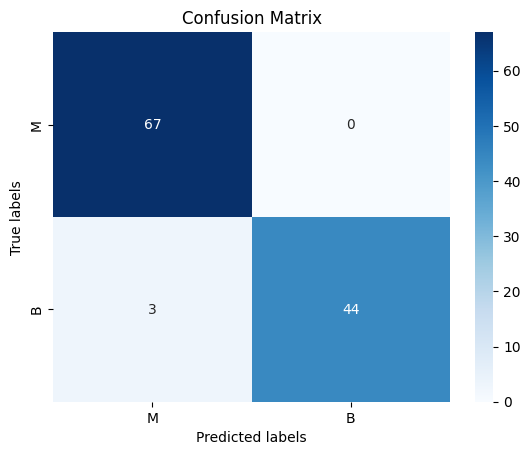

In [34]:

# Generate the confusion matrix array using scikit-learn
actual = y_test
predicted = model.predict(X_test)

cm = confusion_matrix(actual, predicted)

# Define the class labels for the confusion matrix
labels = ['M', 'B']

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [35]:
from sklearn.metrics import classification_report

print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        67
           M       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

